## Data analysis in Python: Open Powerlifting database
by Alexander Steindorfer
<br/><br/>

**Contents**<br>
1.1 Development of the numbers of male and female participants in Powerlifting competitions through time (absolute).<br>
1.2 Development of the numbers of male and female participants in Powerlifting competitions through time (relative).<br>
2.1 Analysis of the age of the participants in Powerlifting competitions.<br>
2.2 Correlation of the age of participants with the total weight lifted in Powerlifting competitions.<br>
3.1 Analysis of correlation of bodyweight with the total weight lifted in Powerlifting competitions.<br>
3.2 Analysis of correlation of the three exercises with the total weight lifted in Powerlifting competitions.<br>
4.1 Development of the average total weight lifted by participants in Powerlifting competitions through time.<br>
<br>

***Please refer to the attached README file for important information as well as a short introduction to the sport underlying the dataset.***
<br/><br/>

**Data source**: https://www.openpowerlifting.org/<br> 
Download from: https://openpowerlifting.gitlab.io/opl-csv/bulk-csv.html<br>
On Kaggle (data until 2019): https://www.kaggle.com/datasets/open-powerlifting/powerlifting-database

*All measurements of weight are using the unit kilograms (kg).*
<br/><br/>

In [356]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [357]:
# Creating a DataFrame from the entire data set.
# Specifying the data type for three columns to avoid a Dtype warning.
df = pd.read_csv("C://data//openpowerlifting.csv", dtype={"State": str, "ParentFederation": str, "MeetState": str})

In [358]:
# Basic insights into the DataFrame.
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768763 entries, 0 to 2768762
Data columns (total 41 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Name              object 
 1   Sex               object 
 2   Event             object 
 3   Equipment         object 
 4   Age               float64
 5   AgeClass          object 
 6   BirthYearClass    object 
 7   Division          object 
 8   BodyweightKg      float64
 9   WeightClassKg     object 
 10  Squat1Kg          float64
 11  Squat2Kg          float64
 12  Squat3Kg          float64
 13  Squat4Kg          float64
 14  Best3SquatKg      float64
 15  Bench1Kg          float64
 16  Bench2Kg          float64
 17  Bench3Kg          float64
 18  Bench4Kg          float64
 19  Best3BenchKg      float64
 20  Deadlift1Kg       float64
 21  Deadlift2Kg       float64
 22  Deadlift3Kg       float64
 23  Deadlift4Kg       float64
 24  Best3DeadliftKg   float64
 25  TotalKg           float64
 26  Place         

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament


In [359]:
# Calculating the percentage of missing data for each column.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print("{} - {}%".format(col, np.round(pct_missing, 2)))

Name - 0.0%
Sex - 0.0%
Event - 0.0%
Equipment - 0.0%
Age - 0.37%
AgeClass - 0.28%
BirthYearClass - 0.35%
Division - 0.0%
BodyweightKg - 0.01%
WeightClassKg - 0.01%
Squat1Kg - 0.74%
Squat2Kg - 0.74%
Squat3Kg - 0.75%
Squat4Kg - 1.0%
Best3SquatKg - 0.34%
Bench1Kg - 0.58%
Bench2Kg - 0.58%
Bench3Kg - 0.6%
Bench4Kg - 0.99%
Best3BenchKg - 0.12%
Deadlift1Kg - 0.7%
Deadlift2Kg - 0.71%
Deadlift3Kg - 0.72%
Deadlift4Kg - 0.99%
Best3DeadliftKg - 0.28%
TotalKg - 0.07%
Place - 0.0%
Dots - 0.08%
Wilks - 0.08%
Glossbrenner - 0.08%
Goodlift - 0.16%
Tested - 0.26%
Country - 0.44%
State - 0.81%
Federation - 0.0%
ParentFederation - 0.36%
Date - 0.0%
MeetCountry - 0.0%
MeetState - 0.27%
MeetTown - 0.12%
MeetName - 0.0%


In [360]:
# Counting and dropping duplicates.
print(df.duplicated().sum())
df = df.drop_duplicates()

3324


In [361]:
# Looking at the overall timeframe of the dataset.
print(df["Date"].min())
print(df["Date"].max())

1964-09-05
2022-08-28


In [362]:
# Sorting by Date and creating a new column, which only contains the year.
df = df.sort_values("Date", ascending=True)
df["Year"] = df["Date"].map(lambda date: date.split("-")[0]).astype("int")

In [363]:
# Counting the number of competitors per year.
df["Year"].value_counts(sort=False)

1964        39
1965        45
1966        71
1967        72
1968       108
1969        57
1970        94
1971       151
1972       257
1973       167
1974       491
1975       504
1976       552
1977      1080
1978       698
1979      3149
1980     20007
1981     21655
1982     24623
1983     27830
1984     29952
1985     15742
1986      5936
1987      6962
1988      8023
1989      9617
1990     10488
1991     10919
1992     11177
1993     11368
1994     10753
1995     16081
1996     13320
1997     15078
1998     18638
1999     18067
2000     20366
2001     22729
2002     28961
2003     30727
2004     31459
2005     30782
2006     32154
2007     38275
2008     41132
2009     43807
2010     76948
2011     87750
2012     99725
2013    115813
2014    156815
2015    191505
2016    216162
2017    234123
2018    249787
2019    261947
2020    139520
2021    174875
2022    126306
Name: Year, dtype: int64

**This shows that, as time progresses, there are more and more entries (if we ignore both the Covid related drop in 2020/21 and the fact that the year 2022 is not yet over by the time this analysis is conducted.)**

### OpenPowerlifting data analysis 1.1
***Development of the numbers of male and female participants in Powerlifting competitions through time (absolute).***

In [364]:
# Selecting the columns to visualise.
df1 = df[["Year","Sex"]].copy()

# I select only male and female, since "Mx" is too small to be visualised in context (about 0.0015%).
# I want to look specifically at the years 2004-2022, since these are the most dynamic in both absolute and relative numbers,
# as exploring the grouped DataFrame below revealed to me.
df1 = df1[(df1["Year"] > 2003) & (df1["Sex"] != "Mx")]

# Dropping missing values.
# I am not applying this to the whole DataFrame, since this will remove a lot of data based on missing values
# in columns I don't intend to use.
df1 = df1.dropna()

In [365]:
# I group the DataFrame to get male and female participants per year.
# as_index=False, because it makes plotting simpler.
df1_grouped = (df1.reset_index().groupby(["Year","Sex"], as_index=False).count()
                .rename(columns={"index":"Count"}))

In [366]:
df1_grouped.set_index(["Year", "Sex"])

Count
Year Sex        
2004 F      5728
     M     25731
2005 F      5387
     M     25395
2006 F      5437
     M     26717
2007 F      6549
     M     31726
2008 F      6577
     M     34555
2009 F      7116
     M     36691
2010 F      8122
     M     68826
2011 F      9951
     M     77799
2012 F     11798
     M     87927
2013 F     16101
     M     99712
2014 F     41137
     M    115678
2015 F     54451
     M    137054
2016 F     64044
     M    152117
2017 F     71754
     M    162366
2018 F     78070
     M    171711
2019 F     82882
     M    179059
2020 F     47858
     M     91660
2021 F     56704
     M    118164
2022 F     30258
     M     96032

Text(0.5, 1.0, 'Participants in Powerlifting competitions 2004-2022 (absolute)')

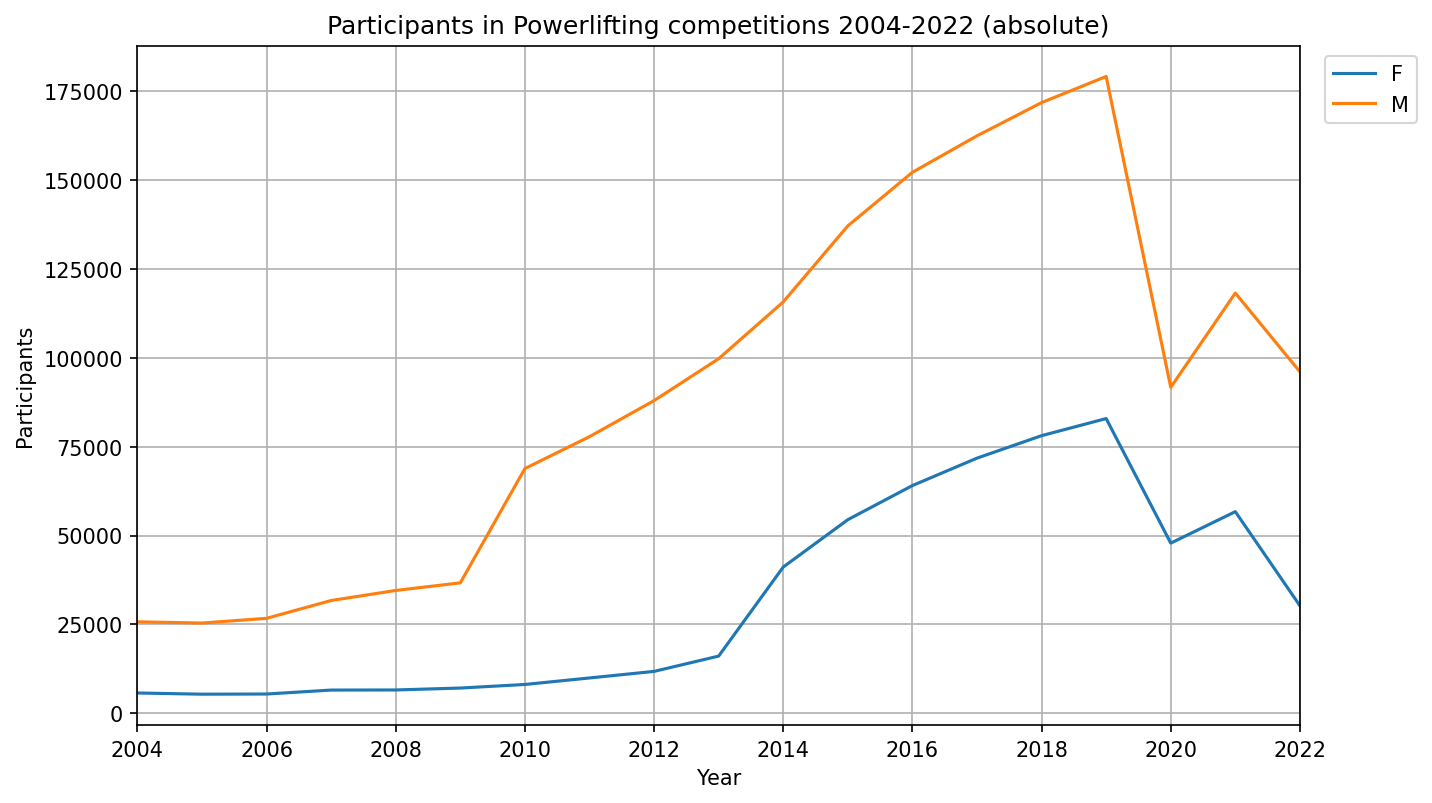

In [367]:
# Plotting the absolute count.
fig, ax = plt.subplots(dpi=150, figsize=(10,6))

for key, data in df1_grouped.groupby("Sex"):
    data.plot(x="Year", y="Count", ax=ax, label=key, xlabel="Year", ylabel="Participants",
              grid=True)

ax.set_xlim(2004,2022)
plt.legend(bbox_to_anchor=(1.11,1))
ax.set_title("Participants in Powerlifting competitions 2004-2022 (absolute)")

**The above plot shows the development of the absolute numbers of participants in Powerlifting competitions between 2004 and 2022.** <br>
It is important to note that, at first glance, it seems as if the numbers of males and females were actually moving apart. This is an illusion which the second plot will counter. <br>
The general trend shows an increase of female participants in competitions compared to males. We can look at the absolute numbers above to see this: In 2004, about 25,700 male and 5,700 female participants were registered, and in 2014, about 115,800 males and 41,200 females.
We can also notice a far less dramatic drop of female participants during Covid restrictions, so that by 2020, both numbers are very close to each other.
It will be interesting to see whether this trend continues in the upcoming years, or not.

### OpenPowerlifting data analysis 1.2
***Development of the numbers of male and female participants in Powerlifting competitions through time (relative).***

Now I create a new column, which will hold the percentage of male and female participants per year.
I will then plot this column.

In [368]:
# Creating a new DataFrame with the total participants per year.
# Note: value_counts returns the Year column as index and renames it to "index" too.
# To revert this, I use rename_axis and then reset_index to get a standard index back.
df1_participants = (df1["Year"].value_counts(sort=False).rename_axis("Year")
                             .reset_index(name="Count"))

In [369]:
# The above returns one row per year. However, the grouped DataFrame contains two rows per year (male/female).
# Therefore, I duplicate all rows of the above result to have the exact same number of rows in both DataFrames,
# which will allow for a mathematical operation between them.
# Cast as DataFrame, otherwise it will return a NumPy array.
df1_participants = pd.DataFrame(np.repeat(df1_participants.values, 2, axis=0), 
                               columns=df1_participants.columns)

In [370]:
# Creating the percentage column.
df1_grouped["Percentage"] = round(df1_grouped["Count"] / df1_participants["Count"] * 100, 2)

In [371]:
df1_grouped.set_index(["Year", "Sex"])

Count  Percentage
Year Sex                    
2004 F      5728       18.21
     M     25731       81.79
2005 F      5387       17.50
     M     25395       82.50
2006 F      5437       16.91
     M     26717       83.09
2007 F      6549       17.11
     M     31726       82.89
2008 F      6577       15.99
     M     34555       84.01
2009 F      7116       16.24
     M     36691       83.76
2010 F      8122       10.56
     M     68826       89.44
2011 F      9951       11.34
     M     77799       88.66
2012 F     11798       11.83
     M     87927       88.17
2013 F     16101       13.90
     M     99712       86.10
2014 F     41137       26.23
     M    115678       73.77
2015 F     54451       28.43
     M    137054       71.57
2016 F     64044       29.63
     M    152117       70.37
2017 F     71754       30.65
     M    162366       69.35
2018 F     78070       31.26
     M    171711       68.74
2019 F     82882       31.64
     M    179059       68.36
2020 F     47858       34.30
     M     91660       65.70
2021 F     56704       32.43
     M    118164       67.57
2022 F     30258       23.96
     M     96032       76.04

Text(0.5, 1.0, 'Participants in Powerlifting competitions 2004-2022 (relative)')

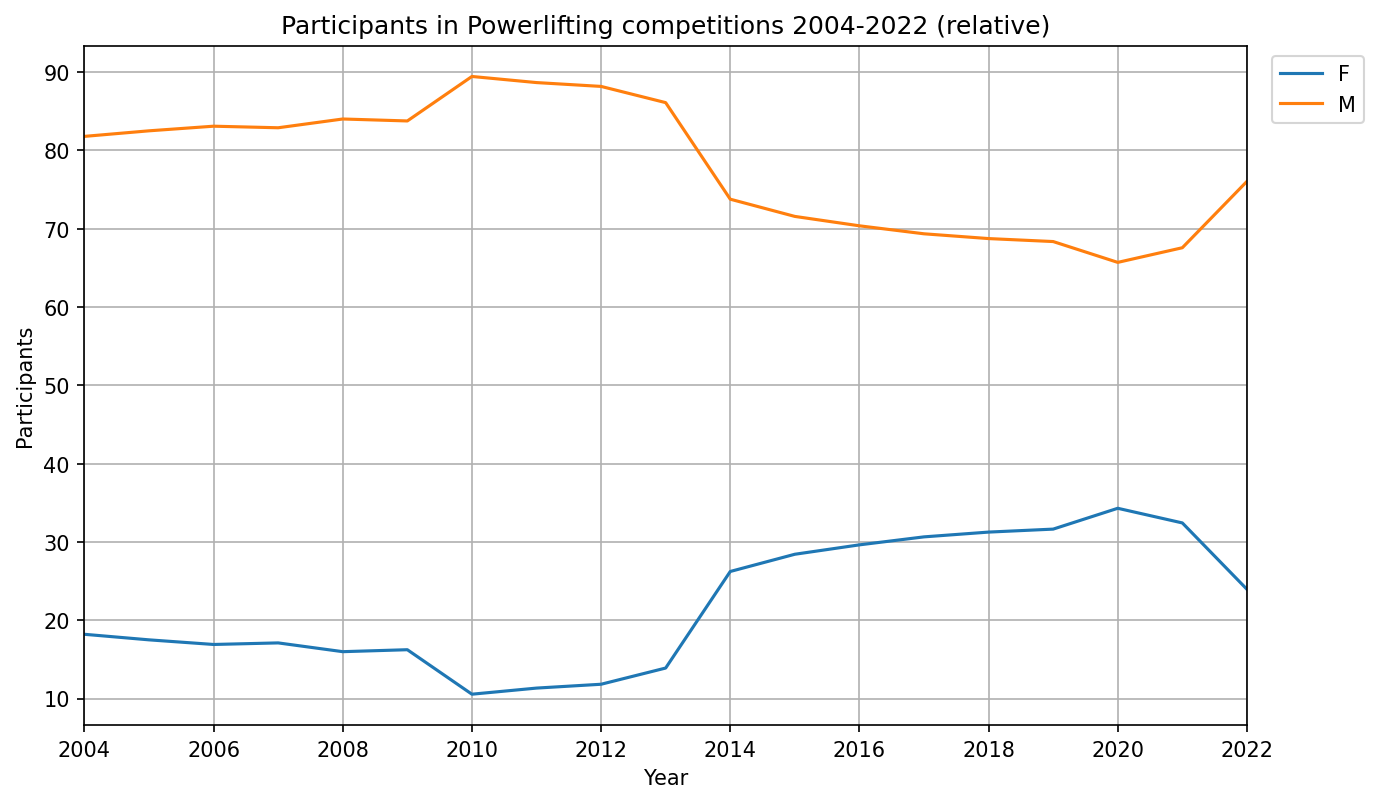

In [372]:
# Plotting the relative count
fig, ax = plt.subplots(dpi=150, figsize=(10,6))

for key, data in df1_grouped.groupby("Sex"):
    data.plot(x="Year", y="Percentage", ax=ax, label=key, xlabel="Year", ylabel="Participants",
              grid=True)

ax.set_xlim(2004,2022)
plt.legend(bbox_to_anchor=(1.11,1))
ax.set_title("Participants in Powerlifting competitions 2004-2022 (relative)")

**The above plot shows the development of the relative numbers of participants in Powerlifting competitions between 2004 and 2022.**<br>
The plot immediately shows an increasing tendency of female participants, since
both lines of the plot are in direct relation to each other, creating a mirrored plot.
While in 2010 we reached the lowest number of females with only about 10%, in 2020
we have about 34%, which is a drastic increase.
We see the opposite tendency again since 2020, but again, the year 2022 is not yet over.

### OpenPowerlifting data analysis 2.1
***Analysis of the age of the participants in Powerlifting competitions.***

In [373]:
df2 = df[["Sex", "Age", "AgeClass", "TotalKg"]].copy()
df2 = df2.sort_values("Age")

# Dropping missing values.
df2 = df2.dropna()

In [374]:
df2.head(20)

,Sex,Age,AgeClass,TotalKg
38358,M,4.5,5-12,30.00
1307542,M,4.5,5-12,610.00
1299099,M,4.5,5-12,147.42
1285198,M,4.5,5-12,188.24
1183904,M,4.5,5-12,482.50
1182867,M,4.5,5-12,192.78
1138008,M,4.5,5-12,415.00
1348799,M,4.5,5-12,158.76
652846,F,4.5,5-12,352.50
1321804,M,4.5,5-12,151.95


**I already see that there are entries where the age is not correctly entered.**

**It is also apparent that there are many entries where the TotalKg is impossible for the respective age (class).
I will ignore this for now and come back to it later.**

I look for the youngest age class to remove all rows with an age below it, since these are not allowed to participate in competitions and must therefore have an incorrect age.

In [375]:
df2["AgeClass"].unique()

array(['5-12', '13-15', '16-17', '18-19', '20-23', '24-34', '35-39',
       '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
       '75-79', '80-999'], dtype=object)

In [376]:
# Rounding down decimals and removing rows where the age is null or below 5 years.
# Again, "Mx" is simply too small to be visualised in context.
df2["Age"] = df2["Age"].apply(np.floor)
df2 = df2[(df2["Age"].notnull()) & (df2["Age"] > 4) & (df2["Sex"] != "Mx")]

In [377]:
print("min. age:", df2["Age"].min())
print("max. age:", df2["Age"].max())
print("avg. age:", round(df2["Age"].mean()))

min. age: 5.0
max. age: 98.0
avg. age: 31


**The range of age now includes 5 to 98 years. The average age is 31 years.**

In [378]:
# Counting the number of participants per age class.
df2["AgeClass"].value_counts(sort=False)

5-12        8353
13-15      56600
16-17     114178
18-19     138995
20-23     275222
24-34     514576
35-39     139414
40-44     124899
45-49      85739
50-54      66128
55-59      41229
60-64      29270
65-69      16673
70-74      11014
75-79       4606
80-999      1884
Name: AgeClass, dtype: int64

**The highest count occurs in the age class 24-34.**

In [379]:
# Adding a 0 in front of the age class 5-12 for proper sorting.
df2["AgeClass"] = df2["AgeClass"].map(lambda x: x.zfill(5))

In [380]:
# Grouping the DataFrame
df2_grouped = (df2.reset_index().groupby(["AgeClass","Sex"], as_index=False).count()
                  .rename(columns={"index":"Count"}))

In [381]:
# Creating a percentage column to show the percentage of males and females per age class.
df2_participants = (df2["AgeClass"].value_counts(sort=False).rename_axis("AgeClass")
                                 .reset_index(name="Count"))

df2_participants = pd.DataFrame(np.repeat(df2_participants.values, 2, axis=0), 
                               columns=df2_participants.columns)

# .astype(int), otherwise the two count columns have different data types.
df2_participants["Count"] = df2_participants["Count"].astype("int")
df2_grouped["Percentage"] = round(df2_grouped["Count"] / df2_participants["Count"] * 100, 2)

In [382]:
# Selecting only relevant columns.
df2_grouped = df2_grouped[["AgeClass", "Sex", "Count", "Percentage"]]
df2_grouped.set_index(["AgeClass", "Sex"])

Count  Percentage
AgeClass Sex                    
05-12    F      2811       33.65
         M      5542       66.35
13-15    F     17004       30.04
         M     39596       69.96
16-17    F     31431       27.53
         M     82747       72.47
18-19    F     33205       23.89
         M    105790       76.11
20-23    F     65436       23.78
         M    209786       76.22
24-34    F    131082       25.47
         M    383494       74.53
35-39    F     37547       26.93
         M    101867       73.07
40-44    F     32210       25.79
         M     92689       74.21
45-49    F     22372       26.09
         M     63367       73.91
50-54    F     16269       24.60
         M     49859       75.40
55-59    F      8743       21.21
         M     32486       78.79
60-64    F      5316       18.16
         M     23954       81.84
65-69    F      2563       15.37
         M     14110       84.63
70-74    F      1384       12.57
         M      9630       87.43
75-79    F       500       10.86
         M      4106       89.14
80-999   F       206       10.93
         M      1678       89.07

**The above shows that, in the younger age classes, the percentage of female participants is greater.**<br>

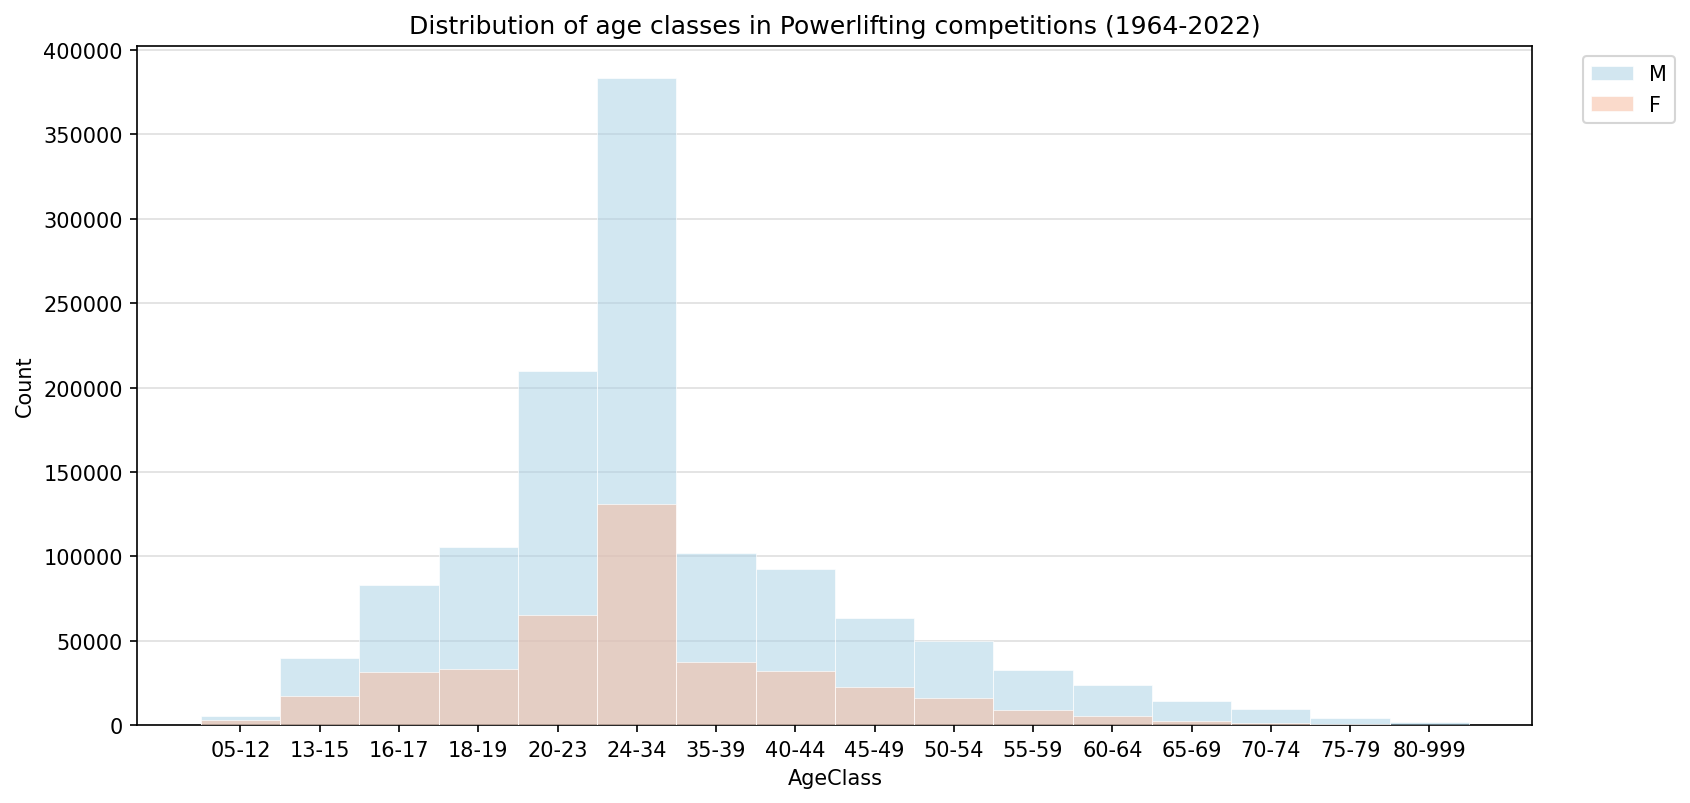

In [383]:
# Plotting the number of participants per age class with a histogram plot.
plt.figure(dpi=150,figsize=(12,6))

(sns.histplot(data=df2, x="AgeClass", hue="Sex", hue_order=["F","M"],
              palette="RdBu", edgecolor="white", linewidth=0.3, zorder=3)
    .set(title="Distribution of age classes in Powerlifting competitions (1964-2022)"))

plt.legend("MF", bbox_to_anchor=(1.11,1))
plt.grid(axis="y", alpha=0.4, zorder=0)

**The above Histogram plot shows the distribution of participants in Powerlifting competitions per age class.**<br>
*(Note: the male bars include the female bars. Every bar therefore starts at value 0.)*<br/><br/>
The plot clearly shows that Powerlifting competitions are most popular in the age class
24 to 34 years, for both men and women, confirming the numbers calculated above. <br>
It also shows that, below 16 years, the relative number of females in competitions is higher
than in any age class above 15 years. For the class 5-12 years, it is even about 50%, which
the numbers above show better than the plot in this case.
Conversely, the older the age class, the lower the relative amount of females in competitions.
This is a great addition to our previous analysis of the sex of competitors, as ***it shows
that we are likely to see an increased number of female competitors in the future***.

### OpenPowerlifting data analysis 2.2
***Correlation of the age of participants with the total weight lifted in Powerlifting competitions.***

Since I will now look at the correlation of age with the total, I need to look at the obvious mistakes where the relation of these two variables is apparently wrong for *competitors of young age*. The following scatter plot was very helpful in further identifying unrealistic outliers.

Correcting these mistakes is difficult and can only be done based on estimations, dropping unrealistic extremes. As a guide, I am looking at the average value for the total of competitors with an age of 12 (150 kg), although this includes the wrong values too. I also researched that one 9 year old athlete indeed achieved a total of 250 kg.

In [384]:
df2.loc[df2["Age"] == 12, "TotalKg"].mean()

150.58258235724745

Based on the above result and further estimations, I drop according to the following conditions:<br>
Age 10 to 12, total above 350 kg; age below 10, total above 280 kg.

In [385]:
df2 = df2.drop(df2[(df2["Age"] >= 10) & (df2["Age"] < 12) & (df2["TotalKg"] > 350)].index)
df2 = df2.drop(df2[(df2["Age"] < 10) & (df2["TotalKg"] > 280)].index)

In [386]:
df2.corr()

,Age,TotalKg
Age,1.00000,-0.10636
TotalKg,-0.10636,1.00000


**The correlation of age with the total is slightly negative. The following plot will clearify this.**

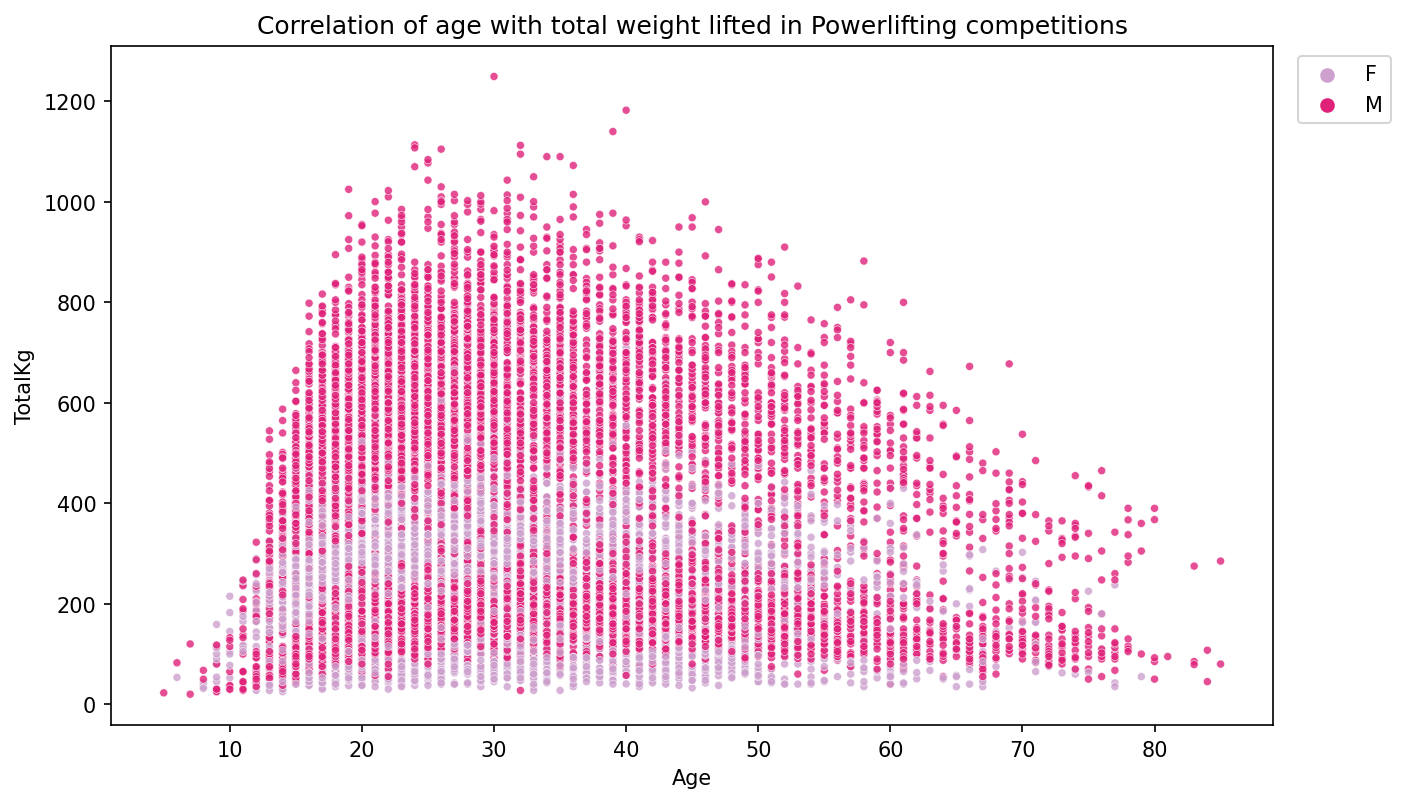

In [387]:
# Plotting the correlation of age with total weight lifted in competitions.
plt.figure(dpi=150,figsize=(10,6))
(sns.scatterplot(data=df2.sample(frac=0.01), x="Age", y="TotalKg", hue="Sex", s=15,
                 palette="PuRd", alpha=0.8)
    .set(title="Correlation of age with total weight lifted in Powerlifting competitions"))
    
plt.legend(bbox_to_anchor=(1.11,1))

**The above scatter plot shows the correlation of age with the total weight lifted in Powerlifting competitions.**<br>
*(Note: I am plotting a sample of 1% of the data for better readability. It is important to note that this has the result that the plot will look slightly different each time it is generated, but the pattern will stay the same, which is important here.)*<br/><br/>
The results show that the highest totals of weight lifted fall roughly between 20 and 40 years of age.
This converges with the fact that the age class 24 to 34 years has the highest number of competitors.
While strength levels seem to increase rapidly between 10 and 20 years of age, after about 40 years, 
a gradual decline is clearly visible.

### OpenPowerlifting data analysis 3.1
***Analysis of correlation of bodyweight with the total weight lifted in Powerlifting competitions.***

In [388]:
df3 = df[["Sex", "BodyweightKg", "TotalKg", "Best3SquatKg", "Best3BenchKg", "Best3DeadliftKg"]].copy()

df3 = df3[df3["Sex"] != "Mx"]
df3 = df3.sort_values(["BodyweightKg", "TotalKg"])

# Dropping rows with missing values.
df3 = df3.dropna()

# Renaming some columns for the following visualisations.
df3 = df3.rename(columns={"BodyweightKg":"Bodyweight", "TotalKg":"Total", "Best3SquatKg":"Best squat",
                          "Best3BenchKg":"Best bench press", "Best3DeadliftKg":"Best deadlift"})

In [389]:
df3.head(10)

,Sex,Bodyweight,Total,Best squat,Best bench press,Best deadlift
1350532,M,10.00,420.00,137.50,92.50,190.00
1460717,F,17.40,67.50,17.50,15.00,35.00
290614,M,17.69,74.84,29.48,15.88,29.48
1460875,F,17.80,62.50,22.50,10.00,30.00
2153536,F,18.00,290.00,110.00,45.00,135.00
1836249,F,18.42,35.83,5.44,5.44,24.95
290288,M,18.78,95.25,31.75,18.14,45.36
181437,M,19.00,120.00,37.50,30.00,52.50
422637,M,19.45,52.50,15.00,12.50,25.00
289773,M,19.50,109.77,34.93,20.41,54.43


**There are definitely entries where the wrong bodyweight has been entered. <br>
The first entry shows a person with a bodyweight of 10 kg and a deadlift of 190 kg. This is physically impossible.** <br/><br/>
Again, this is difficult to clean and can only be done based on an estimations. I use the following condition to drop rows:<br> Bodyweight below 30 kg and total above 200 kg.

In [390]:
df3 = df3.drop(df3[(df3["Bodyweight"] < 30) & (df3["Total"] > 200)].index)

In [391]:
df3[["Bodyweight", "Total"]].corr()

,Bodyweight,Total
Bodyweight,1.000000,0.643947
Total,0.643947,1.000000


**The correlation between bodyweight and total weight lifted in competitions is around 0.64. This confirms the general notion that bodyweight correlates strongly with strength, though not as an absolute rule.**

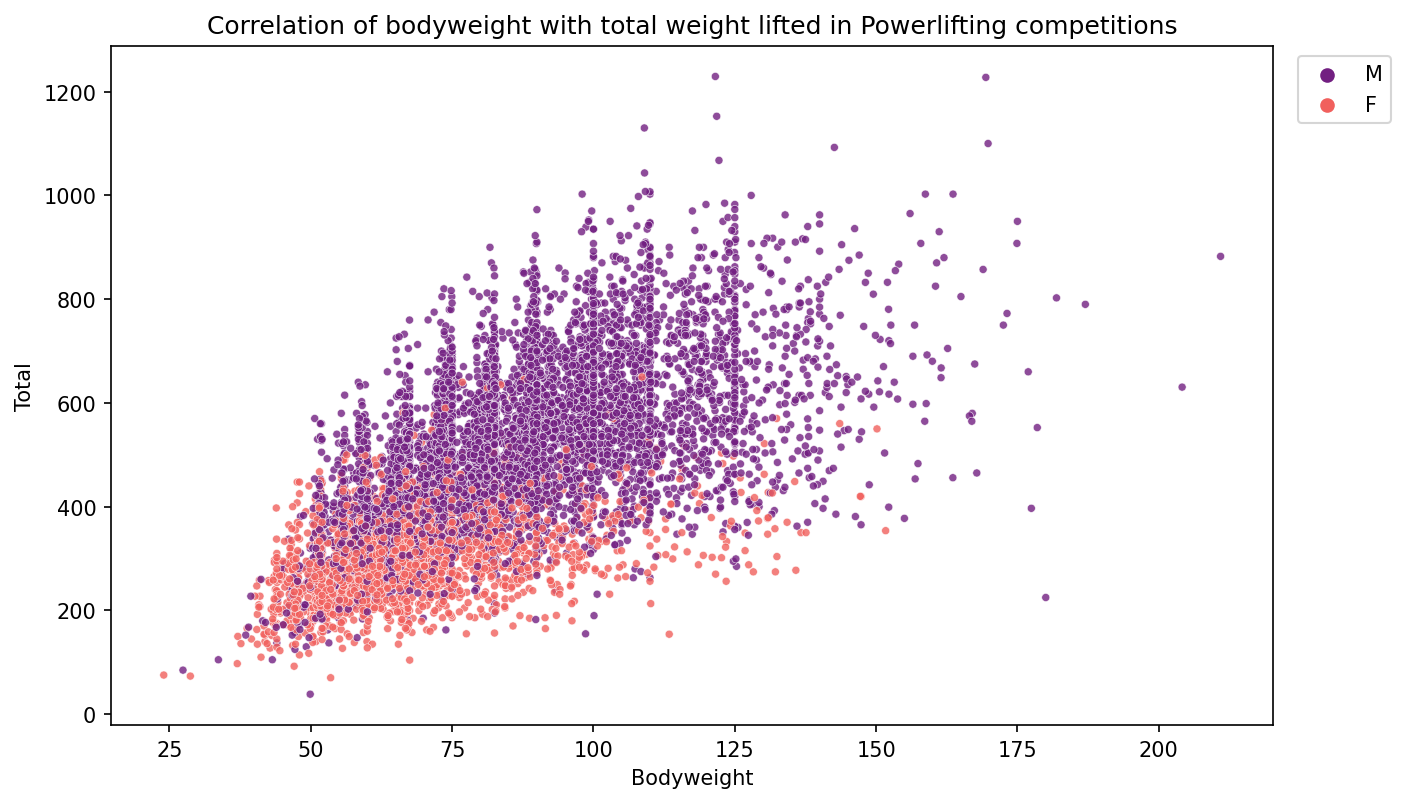

In [392]:
# Plotting the correlation of bodyweight with total weight lifted in competitions
plt.figure(dpi=150,figsize=(10,6)) 
(sns.scatterplot(data=df3.sample(frac=0.005), x="Bodyweight", y="Total", hue="Sex", 
                 hue_order=["M","F"], s=15, palette="magma", alpha=0.8)
    .set(title="Correlation of bodyweight with total weight lifted in Powerlifting competitions"))

plt.legend(bbox_to_anchor=(1.11,1))

**The above scatter plot shows the correlation of bodyweight with the total weight lifted in Powerlifting competitions.**<br>
*(Note: I am plotting a sample of 0.5% of the data for better readability. It is important to note that this has the result that the plot will look slightly different each time it is generated, but the pattern will stay the same, which is important  here.)*<br/><br/>
The plot confirms the numbers calculated above. It shows that the correlation is strong and even forming a regular pattern up to about 110 kg bodyweight. The outliers visible don't seem unrealistic.

### OpenPowerlifting data analysis 3.2
***Analysis of correlation of the three exercises with the total weight lifted in Powerlifting competitions.***

In [393]:
# Dropping the bodyweight column
df3 = df3.drop("Bodyweight", axis=1)

The pair plot below has shown some unrealistic outliers. It is almost impossible to reliably remove all of them, since there can be a lot of circumstances influencing the outcome of a Powerlifting competition, such as injury, or a focus on one particular exercise. I will therefore drop some rows based on estimations.

In [394]:
# Dropping outliers
df3 = df3.drop(df3[(df3["Total"] > 480) & (df3["Best deadlift"] < 100)].index)
df3 = df3.drop(df3[(df3["Total"] > 500) & (df3["Best bench press"] < 50)].index)
df3 = df3.drop(df3[(df3["Total"] > 300) & (df3["Best squat"] < 50)].index)
df3 = df3.drop(df3[(df3["Best squat"] > 300) & (df3["Best deadlift"] < 150)].index)
df3 = df3.drop(df3[(df3["Best squat"] > 230) & (df3["Best deadlift"] < 70)].index)
df3 = df3.drop(df3[(df3["Best bench press"] > 200) & (df3["Best squat"] < 150)].index)
df3 = df3.drop(df3[(df3["Best bench press"] > 200) & (df3["Best deadlift"] < 150)].index)

Text(0.5, 1.0, 'Correlation Matrix: total, squat, bench press, deadlift')

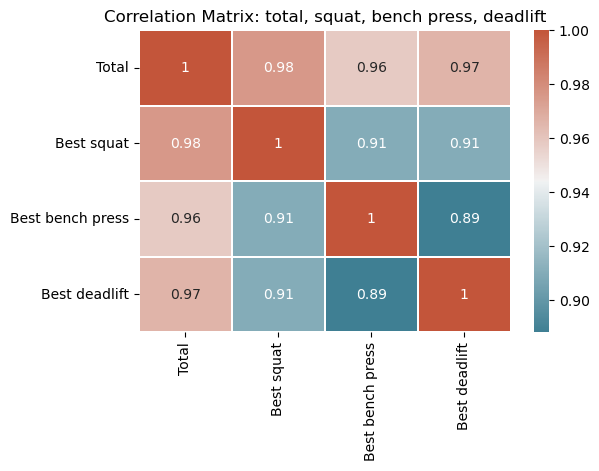

In [395]:
# Plotting the correlation of the three exercises with the total
corr = df3.corr()
plt.figure(dpi=100)
sns.heatmap(data=corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True), linewidth=0.3)
plt.title("Correlation Matrix: total, squat, bench press, deadlift")

**The above heat map shows the correlation of the three exercises with the total weight lifted in Powerlifting competitions.**<br>
Naturally, as the total consists of the best lifts of the three exercises respectively, the correlation is almost identical for all of them.<br>
I find it interesting that the bench press has a lower correlation with the deadlift than with the squat, and also the lowest (although as insignificant as could be) correlation with the total. 

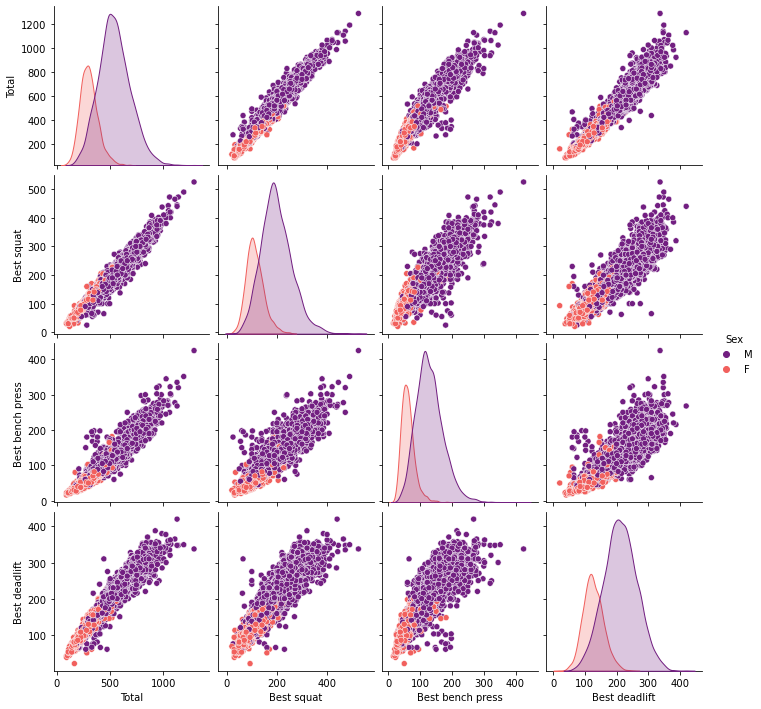

In [396]:
# Plotting a the above correlations on a pair plot.
(sns.pairplot(data=df3.sample(frac=0.005), dropna=True, hue="Sex", hue_order=["M","F"],
              palette="magma"))

**The above pair plot shows the correlations as scatter plots and the strength distribution as kde plots.**<br>
*(Note: I am plotting a sample of 0.5% of the data for better readability. It is important to note that this has the result that the plot will look slightly different each time it is generated, but the pattern will stay the same, which is important here.)*<br/><br/>
We can see that the correlation of the deadlift with the total shows a curve towards the axis of the deadlift, meaning it is easier to increase than the other exercises. It also follows that the deadlift is the main driving force of strength. And indeed there are many strength athletes who say that the deadlift is the best indicator of overall strength.
The bench press shows exactly the opposite tendency, and this is especially true for women, as it is generally the hardest exercise for them. This also shows in the correlations of the bench press with the squat and deadlift respectively.
Furthermore, the correlation of the squat with the total shows that women excell in the squat, which seems to drive their total forward more than the other exercises.

### OpenPowerlifting data analysis 4.1
***Development of the average total weight lifted by participants in Powerlifting competitions through time.***

In [397]:
df4 = df[["Year", "Sex", "TotalKg", "Best3SquatKg", "Best3BenchKg", "Best3DeadliftKg"]].copy()

df4 = df4[df4["Sex"] != "Mx"]
df4 = df4.sort_values(["TotalKg"])

# Dropping missing values
df4 = df4.dropna()

I am first looking at the minimum, maximum and average total weight lifted for both male and female Powerlifters.

In [398]:
# Max, min and average total for male and female.
print("M:")
print(df[df["Sex"] == "M"]["TotalKg"].min())
print(df[df["Sex"] == "M"]["TotalKg"].max())
print("F:")
print(df[df["Sex"] == "F"]["TotalKg"].min())
print(df[df["Sex"] == "F"]["TotalKg"].max())

print("\nM:")
print(np.round(df[df["Sex"] == "M"]["TotalKg"].mean(), 1))
print("F:")
print(np.round(df[df["Sex"] == "F"]["TotalKg"].mean(), 1))

M:
1.0
1407.5
F:
2.5
930.0

M:
415.9
F:
250.6


In [399]:
# Grouping the DataFrame with aggregate mean.
df4_grouped = (df4.groupby(["Year","Sex"], as_index=False).mean())

In [400]:
df4_grouped.set_index(["Year","Sex"]).tail(10)

TotalKg  Best3SquatKg  Best3BenchKg  Best3DeadliftKg
Year Sex                                                         
2018 F    299.045672    112.318907     60.477307       126.249521
     M    529.941173    192.992922    126.036803       210.911965
2019 F    302.772681    113.752268     61.531450       127.489047
     M    530.835012    193.383464    126.146898       211.304843
2020 F    295.287333    112.828029     59.974918       122.484448
     M    511.910709    189.047683    120.799858       202.063348
2021 F    306.214217    114.808712     62.736255       128.669268
     M    537.489706    196.305331    127.446001       213.738535
2022 F    324.976169    118.916486     66.526555       139.533055
     M    518.841968    190.724627    121.800845       206.316523

Text(0.5, 1.0, 'Average total weight lifted in Powerlifting competitions 1964-2022')

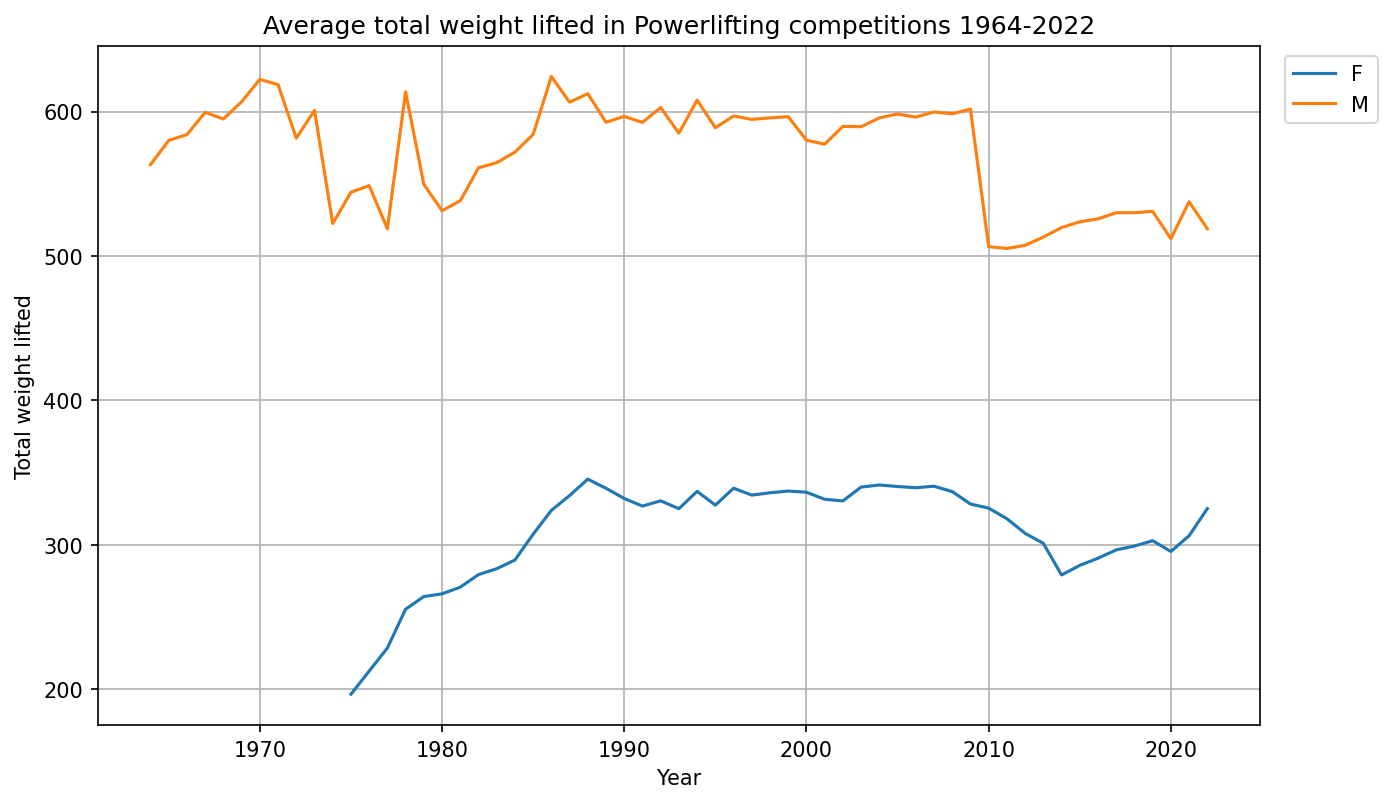

In [401]:
# Plotting the average total.
fig, ax = plt.subplots(dpi=150, figsize=(10,6))

for key, data in df4_grouped.groupby("Sex"):
    data.plot(x="Year", y="TotalKg", ax=ax, label=key, xlabel="Year",
              ylabel="Total weight lifted", grid=True)

plt.legend(bbox_to_anchor=(1.11,1))
ax.set_title("Average total weight lifted in Powerlifting competitions 1964-2022")

**The above plot shows the development of the total weight lifted by participants in Powerlifting competitions.**
<br>
We can see that the average total for male Powerlifters is fairly stable through many decades, ranging between 500 and slightly above 600 kg. 
Whatever happened in 2010, male Powerlifters did not recover from this plunge yet, even though an upwards trend is visible.
Female Powerlifters were able to increase their average total by a factor of 1.5 from the mid 70s to the late 80s, roughly a decade. Generally, female Powerlifters were able to increase their average total much more than male Powerlifters throught the whole timeframe. <br>
It is interesting that, as the number of female participants has been rising since about 2012 (see 1.1/1.2), so has the average total for them, although only from a point lower than previously.